<a href="https://colab.research.google.com/github/pr0fez/AI24-Programmering/blob/master/Exercises/E10-numpy.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

# Numpy exercises

---
These are introductory exercises in Python with focus in **Numpy**.

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your answers in a neat way using <b>f-strings</b>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Dice simulations (*)

Simulations of one die,  

&nbsp; a) Calculate theoretical mean of a dice (six-sided) (*)

&nbsp; b) Now do simulations of

- 10
- 100
- 1000
- 10000
- 100000
- 1000000
- 10000000

number of dices and plot their means. (*)

<details>

<summary>Answer </summary>

a)
```
3.5
```

b) 

<img src="../assets/numpy_1b.png" width = 300>

</details>




In [50]:
import numpy as np
import matplotlib.pyplot as plt
dice = np.array([1, 2, 3, 4, 5, 6])
total = 0
count = 0

for number in dice:
    total += number      # sum the numbers
    count += 1 
                 # count each element

mean = total / count     # divide sum by count
print(mean)  





3.5


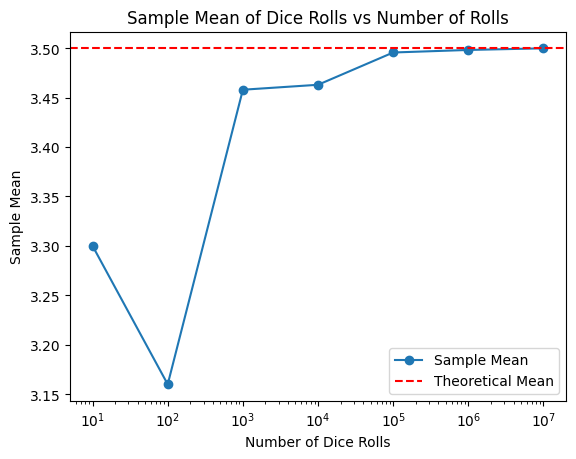

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Dice numbers
dice = np.array([1, 2, 3, 4, 5, 6])

# Number of rolls to simulate
numberOfRolls = [10, 100, 1000, 10000, 100000, 1000000, 10000000]

# List to store the sample means
sample_means = []

# Loop over each number of rolls
for n in numberOfRolls:
    # Simulate n dice rolls
    rolls = np.random.choice(dice, size=n)
    
    # Compute the sample mean
    sample_mean = np.mean(rolls)
    
    # Store the sample mean
    sample_means.append(sample_mean)

# Plot the sample means vs number of rolls
plt.plot(numberOfRolls, sample_means, marker='o', linestyle='-', label='Sample Mean')
plt.axhline(3.5, color='red', linestyle='--', label='Theoretical Mean')
plt.xscale('log')  # log scale for x-axis
plt.xlabel('Number of Dice Rolls')
plt.ylabel('Sample Mean')  # clearly labeled as sample mean
plt.title('Sample Mean of Dice Rolls vs Number of Rolls')
plt.legend()
plt.show()


In [ ]:

numberOfRolls=np.array([10,100,1000,10000,100000,1000000,10000000])
total1=0
count1=0
for number in numberOfRolls:
    total1+=number
    count1+=1
 
 
mean=total1/count1   
plt.plot(numberOfRolls,mean)
plt.xscale("log")
plt.show()




--- 
## 2. Several dices (**)

&nbsp; a) Make a sample space for the sum of two dices, i.e. all possible outcomes of these dices. (*)

&nbsp; b) Count the number of each values in the sample space (*)

&nbsp; c) Now calculate the frequency $f_i$ for each unique value. Also check that the sum of frequencies sums to 1, i.e. $\sum_i f_i = 1$. (*)

&nbsp; d) Make a bar chart of the sum of two dices, with frequencies in y and unique values in x. This is a probability distribution of the sum of your two dices. (*)

&nbsp; e) Now make barplots in subplots of sum of dices for 1 dice, 2 dices, 3 dices and 4 dices. What is the pattern that you see? (**)

<details>

<summary>Hint</summary>

a) 

Here are some potentially useful methods:

```py

np.meshgrid(), np.add.reduce(), np.unique()

```

c)

Divide by the total number of outcomes


</details>

<details>

<summary>Answer</summary>


a) 

Sample space

```
[[ 2  3  4  5  6  7]
 [ 3  4  5  6  7  8]
 [ 4  5  6  7  8  9]
 [ 5  6  7  8  9 10]
 [ 6  7  8  9 10 11]
 [ 7  8  9 10 11 12]]
```

b) 

Unique values:
```
[ 2  3  4  5  6  7  8  9 10 11 12]
```

Count: 
```
[1 2 3 4 5 6 5 4 3 2 1]
```

c)

```
[0.028 0.056 0.083 0.111 0.139 0.167 0.139 0.111 0.083 0.056 0.028]
```

d) 


<img src="../assets/numpy2d.png" width = 300>


e) 

<img src="../assets/numpy2e.png" width = 500>


We see that when we sum several uniformly distributed random variables we will approach the normal distribution. This is called the central limit theorem, which we will come back to in the statistics course.

</details>

In [93]:
import numpy as np
dice1=np.array([1,2,3,4,5,6,])
dice2=np.array([1,2,3,4,5,6])

d1,d2=np.meshgrid(dice1,dice2)
asumption=d1+d2
print(f"a:{asumption}")
falt=asumption.flatten()
print(falt)
unikitems=np.unique(falt)


unikitems, counts = np.unique(falt, return_counts=True)

        
totaloutcome=dice1*dice2

frequencie=counts/totaloutcome


print(f"unikitems:{unikitems}")
print(f"counts:{counts}")
print(f"frequencies{frequencie}")

a:[[ 2  3  4  5  6  7]
 [ 3  4  5  6  7  8]
 [ 4  5  6  7  8  9]
 [ 5  6  7  8  9 10]
 [ 6  7  8  9 10 11]
 [ 7  8  9 10 11 12]]
[ 2  3  4  5  6  7  3  4  5  6  7  8  4  5  6  7  8  9  5  6  7  8  9 10
  6  7  8  9 10 11  7  8  9 10 11 12]


ValueError: operands could not be broadcast together with shapes (11,) (6,) 

--- 
## 3. Monte Carlo simulation (**)

This task has been done in earlier exercise, but now you should do this without any loops. Note that this has enormous performance gain compared to using loops. 

&nbsp; a) Simulate 500000 uniformly distributed points between -1 and 1, $X\sim U(-1,1)$. Now calculate the Euclidean distances between each point and the origin (0,0), $d_i = \sqrt{x_i^2 + y_i^2}$. For $d_i < 1$ plot the point with one color, and for $d_i > 1$ plot the point in another color, $i = \{1,\ldots, 500000\}$.  (**)

&nbsp; b) Calculate the fraction between number of inner points and number of outer points. What do you this will converge to when number of points reaches infinity? (**)


<details>

<summary>Hint</summary>

a) 

Read about numpy random and see if there are some useful methods to use. Also read about 

```
np.linalg.norm()
```

b)

Think in terms of theoretical areas.

</details>

<details>

<summary>Answer</summary>


a) 

<img src="../assets/MC_simulation_500k.png" width = 300>


b) 

0.784724

No answer here, try to prove it theoretically. 


</details>

---

pr0fez Giang

[LinkedIn][linkedIn_pr0fez]

[GitHub portfolio][github_portfolio]

[linkedIn_pr0fez]: https://www.linkedin.com/in/pr0fezgiang/
[github_portfolio]: https://github.com/pr0fez/Portfolio-pr0fez-Giang

---